### import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load the 3 CSV Files

In [38]:
df1 = pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")
df2 = pd.read_csv("api_data_aadhar_enrolment_500000_1000000.csv")
df3 = pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")

print(df1.shape, df2.shape, df3.shape)

(500000, 7) (500000, 7) (6029, 7)


### Merge All CSV Files into One Dataset

In [39]:
df = pd.concat([df1, df2, df3], ignore_index = True)
print("Total rows and columns:", df.shape)


Total rows and columns: (1006029, 7)


### View Dataset Structure

In [41]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


### Data Cleaning & Preprocessing

#### Convert Date Column

In [43]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce') 

In [44]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21


#### Check Missing Values

In [45]:
df.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

#### Remove Duplicates

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21


### Create Total Enrolment Column

In [48]:
df['total_enrolment'] = (
    df['age_0_5'] + 
    df['age_5_17'] + 
    df['age_18_greater']
)

In [49]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51


### Univariate Analysis

In [50]:
df[['age_0_5','age_5_17','age_18_greater','total_enrolment']].describe()

,age_0_5,age_5_17,age_18_greater,total_enrolment
count,983072.000000,983072.000000,983072.000000,983072.000000
mean,3.534216,1.720026,0.169328,5.423570
std,17.726248,14.529760,3.255971,31.932543
min,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,1.000000,0.000000,5.000000
max,2688.000000,1812.000000,855.000000,3965.000000


### Total Enrolmment by State (Bivariate)

In [51]:
state_enrolment = df.groupby('state')['total_enrolment'].sum().sort_values(ascending=False)
state_enrolment.head(10)

state
Uttar Pradesh     1002631
Bihar              593753
Madhya Pradesh     487892
West Bengal        369206
Maharashtra        363446
Rajasthan          340591
Gujarat            275042
Assam              225359
Karnataka          219618
Tamil Nadu         215710
Name: total_enrolment, dtype: int64

### Plot

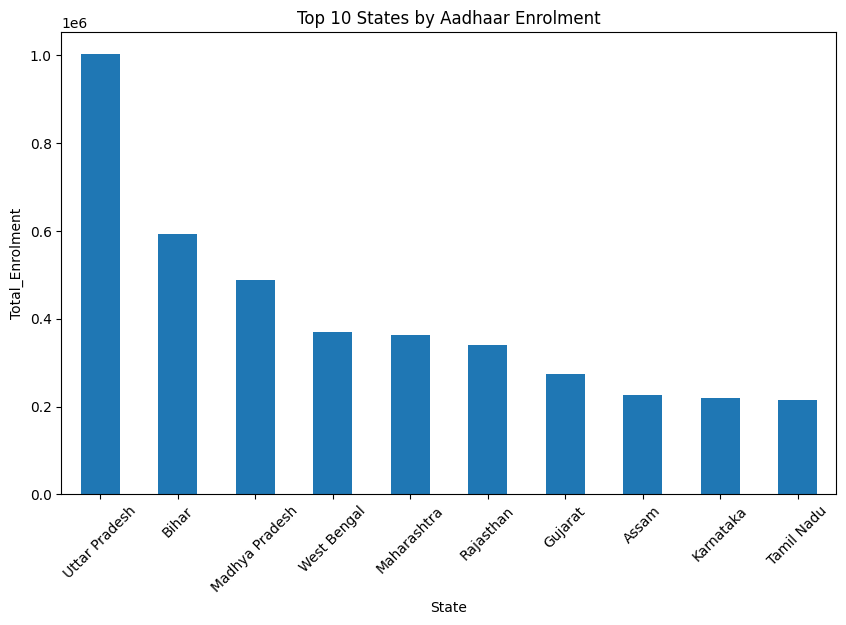

In [52]:
plt.figure(figsize=(10,6))
state_enrolment.head(10).plot(kind='bar')
plt.title("Top 10 States by Aadhaar Enrolment")
plt.xlabel("State")
plt.ylabel("Total_Enrolment")
plt.xticks(rotation=45)
plt.show()
           

### Age Group Distribution (Univariate)

In [53]:
age_totals = df[['age_0_5','age_5_17','age_18_greater']].sum()
age_totals

age_0_5           3474389
age_5_17          1690909
age_18_greater     166462
dtype: int64

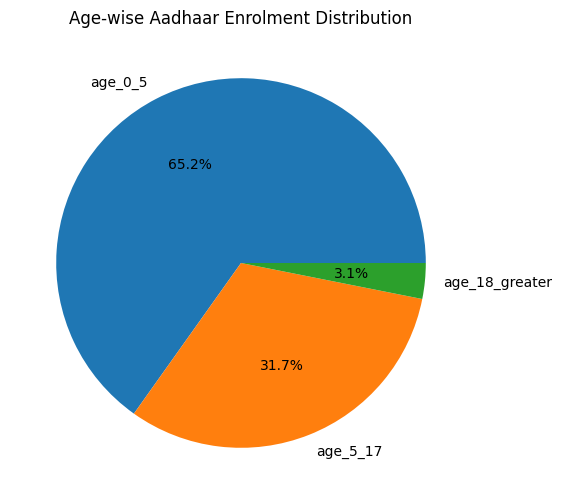

In [54]:
age_totals.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Age-wise Aadhaar Enrolment Distribution")
plt.ylabel("")
plt.show()

### TIme-Based Trend Analysis

In [55]:
yearly_enrolment = df.groupby(df['date'].dt.year)['total_enrolment'].sum()
yearly_enrolment


date
2025    5331760
Name: total_enrolment, dtype: int64

### Plot

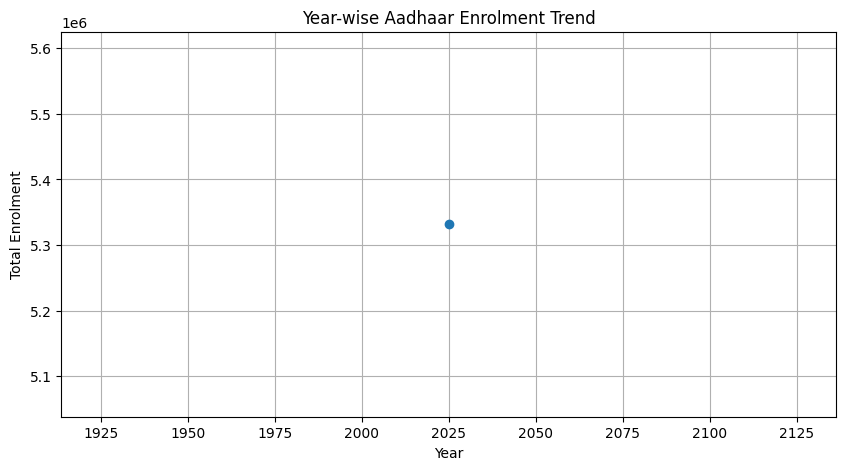

In [57]:
plt.figure(figsize=(10,5))
plt.plot(yearly_enrolment.index, yearly_enrolment.values, marker='o')
plt.title("Year-wise Aadhaar Enrolment Trend")
plt.xlabel("Year")
plt.ylabel("Total Enrolment")
plt.grid(True)
plt.show()

### Trivariate Analysis (State x Age Group)

In [59]:
state_age = df.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum()

state_age.head()

,age_0_5,age_5_17,age_18_greater
state,,,
100000,0,1,213
Andaman & Nicobar Islands,106,5,0
Andaman and Nicobar Islands,363,27,0
Andhra Pradesh,109389,13414,1465
Arunachal Pradesh,1914,2176,150


### Detect Anomalies

In [61]:
threshold = df['total_enrolment'].quantile(0.99)

anomalies = df[df['total_enrolment'] > threshold]

anomalies.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51


In [62]:
df.to_csv("aadhaar_enrolment_cleaned.csv", index=False)

### Reload the cleaned dataset

In [75]:
df = pd.read_csv("aadhaar_enrolment_cleaned.csv")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983072 entries, 0 to 983071
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   date             983072 non-null  object
 1   state            983072 non-null  object
 2   district         983072 non-null  object
 3   pincode          983072 non-null  int64 
 4   age_0_5          983072 non-null  int64 
 5   age_5_17         983072 non-null  int64 
 6   age_18_greater   983072 non-null  int64 
 7   total_enrolment  983072 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 60.0+ MB


### Time features

In [77]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

### Univariate Analysis

In [78]:
df['total_enrolment'].describe()

count    983072.000000
mean          5.423570
std          31.932543
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        3965.000000
Name: total_enrolment, dtype: float64

### Bivariate Analysis (State vs Enrolment)


In [79]:
state_enrolment = (
    df.groupby('state')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
)

state_enrolment.head(10)

state
Uttar Pradesh     1002631
Bihar              593753
Madhya Pradesh     487892
West Bengal        369206
Maharashtra        363446
Rajasthan          340591
Gujarat            275042
Assam              225359
Karnataka          219618
Tamil Nadu         215710
Name: total_enrolment, dtype: int64

### Trivariate Analysis (State x Year x Enrolment)

In [81]:
state_year = (
    df.groupby(['state','year'])['total_enrolment']
    .sum()
    .reset_index()
)

state_year.head(10)

,state,year,total_enrolment


### Create Visuals

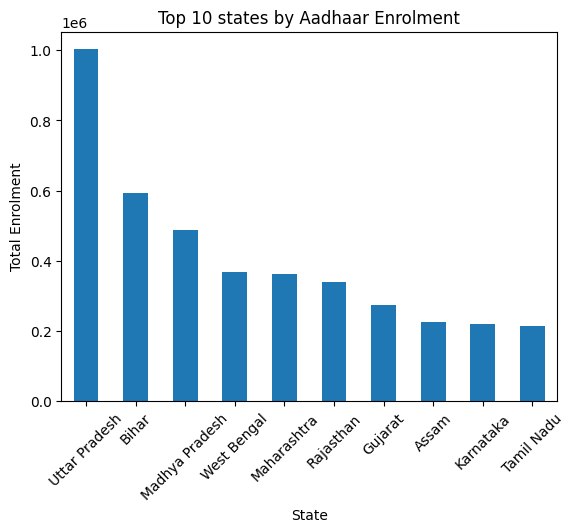

In [82]:
state_enrolment.head(10).plot(kind='bar')
plt.title("Top 10 states by Aadhaar Enrolment")
plt.xlabel("State")
plt.ylabel("Total Enrolment")
plt.xticks(rotation=45)
plt.show()

### Year-wise Trend

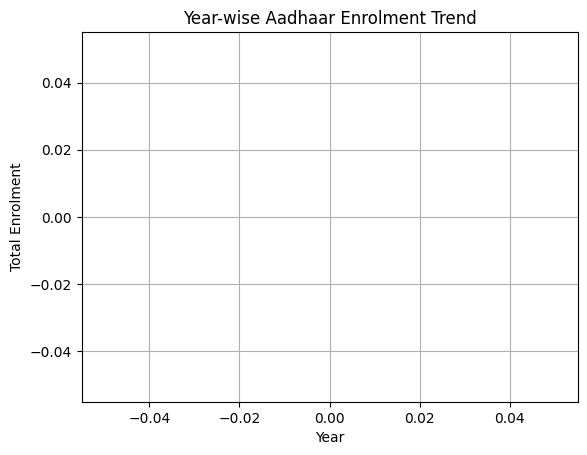

In [83]:
yearly = df.groupby('year')['total_enrolment'].sum()
plt.plot(yearly.index, yearly.values, marker='o')
plt.title("Year-wise Aadhaar Enrolment Trend")
plt.xlabel("Year")
plt.ylabel("Total Enrolment")
plt.grid(True)
plt.show()